In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

# Read File
df = pd.read_csv('NYC TLC Trip Record.csv')
location = pd.read_csv('lookup_location.csv')

# display(df,location)


# Background
Taxis in New York City (NYC) are a key element in the city's transportation system, offering fast and flexible services amidst the hustle and complexity of public transport. Known as one of the world's largest metropolises, NYC is always bustling, and taxis play a crucial role in connecting various parts of the city, particularly those less accessible by subway and bus. Their role in the transportation system is vital, enabling quick and efficient movement, while also enhancing accessibility and convenience for a range of needs, from local residents to tourists exploring the city's dynamism.<br>
 Taxi regulations in NYC are regulated by the New York City (NYC) Taxi and Limousine Commission (TLC). 
## Problem Statement
Drivers in New York City lost an average of 102 hours to traffic jams in 2021. In 2022, there were a total of 110,000 taxis circulating in New York City.
Regarding traffic congestion, there are 700,000 cars, taxis, and trucks entering Lower Manhattan in daily. This is one of the busiest areas in the world with the worst congestion in the United States. The average car speed is 11 KPH (source: detik.com, nyc.streetsblog.org).

Various strategic way have been made to address this congestion,  one them is a ride-sharing system for taxis in NYC. This Ride Sharing allows users to reduce congestion, as several consumers with the same destination are loaded into one taxi, theoretically reducing the number of taxis circulating in New York City by as much as 50%. However, practically, this **Ride Sharing is not popular among New Yorkers. From the NYC TLC  data  in January 2023, there were no taxi transactions using the ride-sharing rate code.**


## Objective
The aim of this case study is to analyze the factors that cause the option of 'ride sharing' is less favored by consumers.

## Project Scope
Using the NYC TLC trip record from January 2023, the scope of this project is to analyze taxi usage based on aspects such as time and service area.

# Data Set & Data Understanding

To address the problem mentioned above, there are various datasets available from the Taxi and Limousine Commission New York City website. The datasets used are as follows:<br>
- Main data set containing NYC taxi usage traffic for the year 2023.
- Dataset NYC TLC Location ID.
- Supporting data from the Data Dictionary - Yellow Taxi Trip Record.


## Data Set 1: Main Data Set
In this main data set, we're using a file called "NYC TLC Trip Record.csv". <br>
For easier handling of this project, we'll refer to this dataset as "df" from now on.<br>
Here's a breakdown of what each column in this file represents:<br>

| Field Name                    | Description                                                                              | Unit                 |
|-------------------------------|------------------------------------------------------------------------------------------|----------------------|
|  VendorID                     |  ID of the vendor indicating the TPEP   provider that provided the record.               | category             |
| lpep_pickup_datetime          |  The time when the passenger is picked up by   the taxi.                                 | YYYY-MM-DD/ HH-mm-dd |
| lpep_dropoff_datetime         |  The time when the passenger is dropped off   by the taxi.                               | YYYY-MM-DD/ HH-mm-ss |
| store_and_fwd_flag            |  An   indicator showing whether trip data was stored in the vehicle’s memory             | category             |
| RatecodeID                    |  A   code indicating the fare rate applied to the trip.                                  | category             |
| PULocationID and DOLocationID |  Location IDs for the pickup (Pick-Up) and   drop-off (Drop-Off) locations.              | category             |
| passenger_count               |  The number of passengers in the trip.                                                   | person               |
| trip_distance                 |  The distance of the trip in miles.                                                      | miles                |
| fare_amount                   |  The amount of fare charged for the trip   (excluding other additional charges).         | $                    |
| extra                         |  Additional charges that may apply, such as   night or weekend fees.                     | $                    |
| mta_tax                       |  Tax imposed by the Metropolitan   Transportation Authority (MTA).                       | $                    |
| tip_amount                    |  The amount of tip given by the passenger to   the driver.                               | $                    |
| tolls_amount                  |  The amount of toll charges incurred during   the trip.                                  | $                    |
| ehail_fee                     |  Fee for e-hailing services, if any.                                                     | $                    |
| improvement_surcharge         |  An   additional fee for service improvements.                                           | $                    |
| total_amount                  |  The total amount to be paid including all   fares, additional charges, taxes, and tips. | $                    |
| payment_type                  |  The type of payment used, for example, cash,   credit card, etc.                        | category             |
| trip_type                     |  The type of trip, for example, standard   journey, journey booked through an app, etc.  | category             |
| congestion_surcharge          |  An   additional charge due to traffic congestion.                                       | $                    |




## Data Set 2: Dataset NYC TLC Location ID.
In this  data set, we're using a file called "lookup_location". (source: https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv) <br>
For easier handling of this project, we'll refer to this dataset as "location" from now on.<br>
 Field:        Description<br>                                      
 LocationID:   location unique identifier.<br>                      
 Borough: administrative divisions of NYC.<br>                 
 Zone: a smaller area or neighborhood within a borough.<br> 
 service_zone: servoce zone classification.<br>

## Data Set 3:  Supporting Data, Data Dictionary
This dataset contains supporting data variables that can be used to further explain Data Set 1.<br>
(source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) <br>
This data manually inputted into a dictionary form.<br>
The dictionaries are:<br>
<br>
 - VendorID:<br>
1: Creative Mobile Technologies, LLC;<br>
2: VeriFone Inc.<br>
<br>
- RatecodeID:<br>
1: Standard rate (Regular fares outside the airport)<br> 
2: JFK (fare to/from JFK Airport)<br>
3: Newark (fare to/from Newark Airport)<br>
4: Nassau or Westchester (fare to/from Nassau or Wenchester)<br>
5: Negotiated fare<br>
6: Group ride<br>
<br>
- Store_and_fwd_flag:<br>
Y: store and forward trip<br>                                    
N: not a store and forward trip<br>     
<br>                         
- payment_type:<br>
1: Credit card<br>                                          
2: Cash<br>                                      
3: No charge<br>                                  
4: Dispute <br>                              
5: Unknown <br>                          
6: Voided trip <br>                      

In [2]:
display(df,location) # display main dataset and dictionary 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [3]:
# lookup dictionary
vendorID = {
    1: "Creative Mobile Technologies, LLC",
    2: "VeriFone Inc."
}
ratecodeID = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated fare",
    6: "Group ride"
}
store_and_fwd_flag =  {
    "Y": "store and forward trip",
    "N": "not a store and forward trip"
}
payment_type = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

trip_type = {
    1: "street-hail",
    2: "dispatch",
    3: "others",
}

# Initial Data Checking
Initial Data Checking is performed to determine the number of columns and rows to obtain information, data shape, and missing values for each column

### Table Shape Information

In [4]:
print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)

df shape: (68211, 20)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
VendorID,VendorID,int64,0,0.000000,0,2,"[2, 1]"
lpep_pickup_datetime,lpep_pickup_datetime,object,0,0.000000,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
lpep_dropoff_datetime,lpep_dropoff_datetime,object,0,0.000000,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
store_and_fwd_flag,store_and_fwd_flag,object,4324,6.339154,0,2,"[N, Y, nan]"
RatecodeID,RatecodeID,float64,4324,6.339154,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
PULocationID,PULocationID,int64,0,0.000000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83]"
DOLocationID,DOLocationID,int64,0,0.000000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140]"
passenger_count,passenger_count,float64,4324,6.339154,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
trip_distance,trip_distance,float64,0,0.000000,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
fare_amount,fare_amount,float64,0,0.000000,176,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Based on the table above, we can see that there are missing values in the columns: store_and_fwd_flag, RatecodeID, passenger_count, ehaill_fee, payment_type, trip_type, and congestion_surcharge.<br>
The percentage of missing values in the data is relatively small, at 6.3%. Therefore, handling missing data can be done in two ways: either by dropping all missing values (due to the low percentage of missing values) or by trying various approaches to fill in the missing values.<br>
However, to preserve the originality of the data, various methods will be further applied to address the missing values in the dataset. The steps for this will be discussed further in the data wrangling phase.<br>

### Descriptive Statistical Checking
The purpose of descriptive statistical checking is to identify any data anomalies

In [5]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


Based on the table above, we can observe various negative values in the table, specifically in the columns: fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, and total_amount.<br>
For the columns mentioned, it is not possible for the values to be negative. Further data investigation is needed to determine the reasons for the presence of negative values in this dataset.<br>
 This will ensure that the dataset to be processed becomes more realistic.

#### HeatMap Missing Values

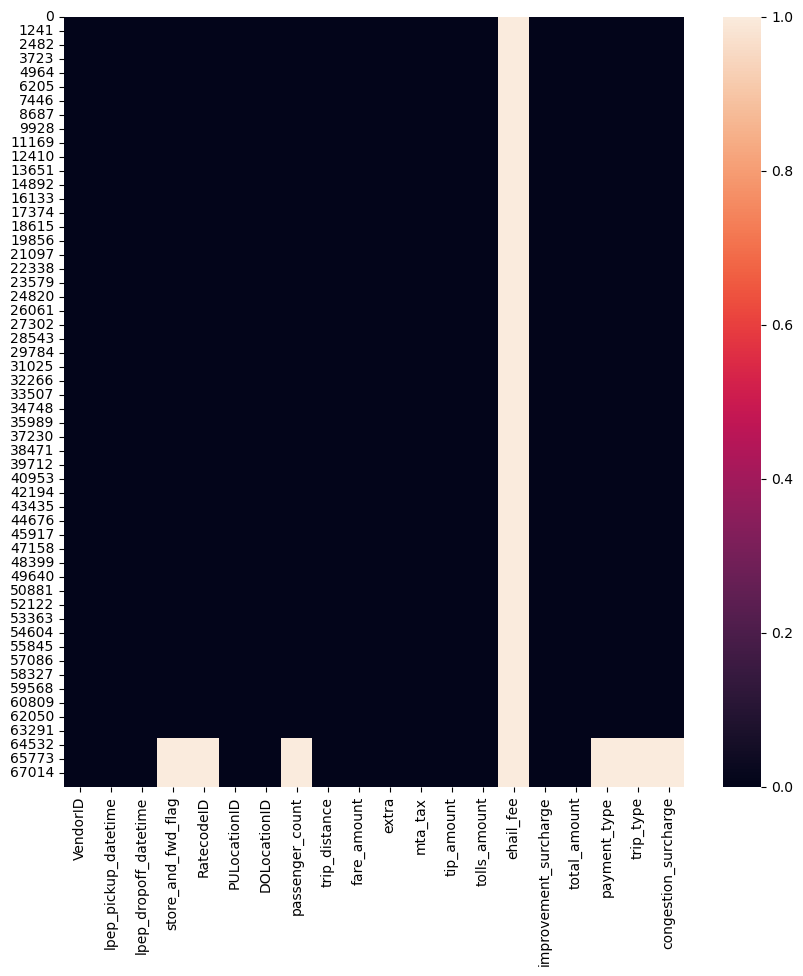

In [6]:
# missing values distribution
plt.figure(figsize=(10,10))
heatmap_missing_values =  sns.heatmap(df.isna())

Based on the heatmap above, it is evident that missing values in the columns store_and_fwd_flag, RatecodeID, passenger_count, ehaill_fee, payment_type, trip_type, and congestion_surcharge all originate from the same rows.<br>
For the column ehail_fee, it will be dropped from the dataset because it has a 100% missing value rate, and there is no meaningful insight that can be derived from this column.

## Initial Data Checking Conclusion
- Based on the "Sample Unique" table, there is an error value in the "RatecodeID" column with a value of 99 because there is no Ratecode with that value.
- Based on the "Sample Unique" table, there are error values in the columns "fare_amount," "extra," "mta_tax," "tip_amount," "improvement_surcharge," "total_amount," and "congestion_surcharge" because they have negative values.
- Based on the "PU_datetime" column, there is data anomaly in the form of dates outside the specified year range.
- From the number of missing values table and the missing values heatmap, we can see that there is a similarity in missing values in the following columns: ['store_and_fwd_flag,' 'RatecodeID,' 'passenger_count,' 'payment_type,' 'trip_type,' 'congestion_surcharge'].
- The 'ehail_fee' column can be dropped directly because there is no data/information in that column (it has a null data percentage of 100%).

# Data Wrangling

## Data & Handling Cleansing

### Remove Duplicate Data
Before we proceed with dropping duplicate data, it's important to first checking whether our dataset contains any duplicate data or not. This checking is performed to ensure that the step of removing duplicate data is only carried out if genuinely duplicate data is found in the dataset. If there are no duplicate data, there is no need for removal, and the dataset can be processed further.

In [7]:
#checking duplicate
cek_duplikat = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime','PULocationID','DOLocationID'], keep = False)]
cek_duplikat

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,4.0,1.0,0.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,NaN,-1.0,-11.1,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,0.5,0.5,0.0,0.0,NaN,0.3,3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,NaN,-1.0,-6.2,3.0,1.0,0.0
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,1.0,0.5,0.0,0.0,NaN,1.0,6.2,3.0,1.0,0.0
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,0.0,0.0,0.0,0.0,NaN,-1.0,-11.0,4.0,2.0,0.0


Based on the table above, there are a total of 348 rows that are duplicates, and in the second row of these duplicate data, the values are negative. <br>
Therefore, it can be concluded that some of the negative values we discussed earlier likely originated from duplicate data in this dataset.<br>
Hence, the next step is to attempt to remove these negative values while considering that we have identified them as duplicate data that needs to be removed.

In [8]:
# drop duplicate
df.drop_duplicates(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], keep='last', inplace=True)

#checking previous syntax

print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],

    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)

df shape: (68037, 20)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
VendorID,VendorID,int64,0,0.000000,0,2,"[2, 1]"
lpep_pickup_datetime,lpep_pickup_datetime,object,0,0.000000,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
lpep_dropoff_datetime,lpep_dropoff_datetime,object,0,0.000000,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
store_and_fwd_flag,store_and_fwd_flag,object,4324,6.355365,0,2,"[N, Y, nan]"
RatecodeID,RatecodeID,float64,4324,6.355365,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
PULocationID,PULocationID,int64,0,0.000000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83]"
DOLocationID,DOLocationID,int64,0,0.000000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140]"
passenger_count,passenger_count,float64,4324,6.355365,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
trip_distance,trip_distance,float64,0,0.000000,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
fare_amount,fare_amount,float64,0,0.000000,5,2530,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


After dropping duplicate values, the remaining negative values are found in the fare_amount and total_amount columns. <br>
Because the number of negative values here is very small, we can directly remove the rows that have negative values.

In [9]:
# show negative value in 'fare_amount'
negative_fare = df[df['fare_amount'] < 0]
negative_total = df[df['total_amount'] < 0]

# drop negative value
df.drop(df[(df['fare_amount'] < 0) | (df['total_amount'] < 0)].index, inplace=True)

In [10]:
#checking previous syntax

df.shape
print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)


df shape: (68032, 20)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
VendorID,VendorID,int64,0,0.000000,0,2,"[2, 1]"
lpep_pickup_datetime,lpep_pickup_datetime,object,0,0.000000,0,66572,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
lpep_dropoff_datetime,lpep_dropoff_datetime,object,0,0.000000,0,66516,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
store_and_fwd_flag,store_and_fwd_flag,object,4319,6.348483,0,2,"[N, Y, nan]"
RatecodeID,RatecodeID,float64,4319,6.348483,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
PULocationID,PULocationID,int64,0,0.000000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83]"
DOLocationID,DOLocationID,int64,0,0.000000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140]"
passenger_count,passenger_count,float64,4319,6.348483,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
trip_distance,trip_distance,float64,0,0.000000,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
fare_amount,fare_amount,float64,0,0.000000,0,2525,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


### drop trip distance = 0


In [11]:
# # Filter rows with 'trip_distance' values not equal to 0
# df = df[df['trip_distance'] != 0]

### Dropping Unnecessary Columns in Analysis
Based on the previously discussed missing values table, there are several columns that will not be used in the data analysis. These columns include:<br>
'VendorID', 'store_and_fwd_flag''ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 

In [12]:
# Drop columns that is not  used in data analysis
df.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount'], axis=1, inplace=True)
df

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.90,4.03,1.0,1.0
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.70,2.64,1.0,1.0
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.20,1.94,1.0,1.0
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.50,1.70,1.0,1.0
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.00,0.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,49,62,NaN,4070.82,15.70,0.00,NaN,NaN
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,10,205,NaN,2.14,4.41,0.00,NaN,NaN
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,66,37,NaN,3.44,16.53,3.51,NaN,NaN
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,225,189,NaN,3.03,14.98,3.20,NaN,NaN


### Handling ratecodeID Column
#### Handling Missing Values
From the available ratecode dictionary, there are 5 types of rates recognized by NYC TLC, which are Standard rate, JFK, Newark, Nassau or Westchester, Negotiated fare, and Group ride.<br>
For taxis with JFK or Newark as the destination/origin, they will be assigned values 2 or 3, following the regulations provided by the regulator.<br>
To fill missing values for destinations/origins outside of JFK or Newark, the missing values will be filled with 1 (standard rate). This is because the standard rate is the mode value and serves as a more general reference, reducing bias assumptions compared to JFK, Newark, Nassau or Westchester, Negotiated fare, or Group ride.<br>
Values equal to 99, as indicated in the initial data checking, will also be converted to 1.

In [13]:
# fill in missing values for the destination/origin of JFK or Newark airports.
df.loc[(df['PULocationID'] == 132) | (df['DOLocationID'] == 132) & df['RatecodeID'].isna(), 'RatecodeID'] = 2
df.loc[(df['PULocationID'] == 1) | (df['DOLocationID'] == 1) & df['RatecodeID'].isna(), 'RatecodeID'] = 3
# replace ratecodeID = 99 to ratecodeID = 1
df['RatecodeID'].replace(99, 1, inplace=True)
# fill in other missing values with  value = 1
df['RatecodeID'].fillna(1, inplace = True)

In [14]:
#checking previous syntax
df['RatecodeID'].value_counts()

RatecodeID
1.0    66152
5.0     1511
2.0      277
4.0       57
3.0       35
Name: count, dtype: int64

In [15]:
# show missing values
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count          4319
trip_distance               0
fare_amount                 0
tip_amount                  0
payment_type             4319
trip_type                4329
dtype: int64

#### Replace Values with a Data Dictionary

In [16]:
# replace values with dictionary data
df['RatecodeID'] = df['RatecodeID'].astype(int)  # Convert to integer
df['RatecodeID'] = df['RatecodeID'].map(ratecodeID)

# showing previous syntax
display(df['RatecodeID'].unique(), df)

array(['Standard rate', 'Negotiated fare', 'Nassau or Westchester',
       'Newark', 'JFK'], dtype=object)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.90,4.03,1.0,1.0
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.70,2.64,1.0,1.0
2,2023-01-01 00:35:12,2023-01-01 00:41:32,Standard rate,223,179,1.0,0.00,7.20,1.94,1.0,1.0
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,41,238,1.0,1.30,6.50,1.70,1.0,1.0
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,41,74,1.0,1.10,6.00,0.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,Standard rate,49,62,NaN,4070.82,15.70,0.00,NaN,NaN
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Standard rate,10,205,NaN,2.14,4.41,0.00,NaN,NaN
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Standard rate,66,37,NaN,3.44,16.53,3.51,NaN,NaN
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Standard rate,225,189,NaN,3.03,14.98,3.20,NaN,NaN


### Handling Missing Values in passenger_count Column
Missing values in the "passenger_count" column can be filled with a value of 1 because the minimum number of passengers required for a taxi to operate is 1.<br>
Additionally, for values equal to 0 in this column, they will be replaced with a value of 1.

In [17]:
# replace passenger_count = 0 with  passenger_count = 1
df.passenger_count.replace({0:1}, inplace=True)

# replace missing values with  passenger_count = 1
df['passenger_count'].fillna(1, inplace=True)

In [18]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
tip_amount                  0
payment_type             4319
trip_type                4329
dtype: int64

### Handling payment_type Column
From the available payment_type dictionary, there are 5 types of payments recognized by NYC TLC, which are credit card, cash, no charge, dispute, unknown, and voided trip.<br>
For missing values in this column, they will be filled with the type "unknown" to avoid making excessive assumptions.

In [19]:
# replace missing values with  5 (unknown)
df['payment_type'] = df['payment_type'].fillna(5).astype(int)

# replace values with dictionary data
df['payment_type'] = df['payment_type'].map(payment_type)

In [20]:
# checkingprevious syntax
df

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.90,4.03,Credit card,1.0
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.70,2.64,Credit card,1.0
2,2023-01-01 00:35:12,2023-01-01 00:41:32,Standard rate,223,179,1.0,0.00,7.20,1.94,Credit card,1.0
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,41,238,1.0,1.30,6.50,1.70,Credit card,1.0
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,41,74,1.0,1.10,6.00,0.00,Credit card,1.0
...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,Standard rate,49,62,1.0,4070.82,15.70,0.00,Unknown,NaN
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Standard rate,10,205,1.0,2.14,4.41,0.00,Unknown,NaN
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Standard rate,66,37,1.0,3.44,16.53,3.51,Unknown,NaN
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Standard rate,225,189,1.0,3.03,14.98,3.20,Unknown,NaN


### Handling trip_type column
Missing values in this column will be categorized as "others."

In [21]:
# fill in missing values with new category, 3 (others)
df['trip_type'] = df['trip_type'].fillna(3).astype(int)

# replace values with dictionary data
df['trip_type'] = df['trip_type'].map(trip_type)

In [22]:
# checking missing values
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
payment_type             0
trip_type                0
dtype: int64

In [23]:
# checking data frame
df

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.90,4.03,Credit card,street-hail
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.70,2.64,Credit card,street-hail
2,2023-01-01 00:35:12,2023-01-01 00:41:32,Standard rate,223,179,1.0,0.00,7.20,1.94,Credit card,street-hail
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,41,238,1.0,1.30,6.50,1.70,Credit card,street-hail
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,41,74,1.0,1.10,6.00,0.00,Credit card,street-hail
...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,Standard rate,49,62,1.0,4070.82,15.70,0.00,Unknown,others
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Standard rate,10,205,1.0,2.14,4.41,0.00,Unknown,others
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Standard rate,66,37,1.0,3.44,16.53,3.51,Unknown,others
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Standard rate,225,189,1.0,3.03,14.98,3.20,Unknown,others


### Handling lpep_pickup_datetime", "lpep_dropoff_datetime" Columns

#### Date and Time formatting
Data handling in this context involves converting the data in the "lpep_pickup_datetime" and "lpep_dropoff_datetime" columns, which are currently in object (string) format, into a date and time format.<br>
Once this formatting is done, the data can be further processed to creating a new column called "trip_duration.".<br>
This "trip_duration" column will likely represent the duration of each trip in a specific time unit (e.g., minutes or hours) and can be calculated by subtracting the pickup time from the dropoff time.

In [24]:
# change format object to date and time
df["lpep_pickup_datetime"] = df["lpep_pickup_datetime"].astype('datetime64[s]')
df["lpep_dropoff_datetime"] = df["lpep_dropoff_datetime"].astype('datetime64[s]')


# change column names for practicality
df = df.rename(
    columns={
        'lpep_pickup_datetime': 'pickup_datetime', 
        'lpep_dropoff_datetime': 'dropoff_datetime'
    }
)
# creating new column "trip_duration"
df.insert(3, 'trip_duration', (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()/60)

display(df,df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68032 entries, 0 to 68210
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype        
---  ------            --------------  -----        
 0   pickup_datetime   68032 non-null  datetime64[s]
 1   dropoff_datetime  68032 non-null  datetime64[s]
 2   RatecodeID        68032 non-null  object       
 3   trip_duration     68032 non-null  float64      
 4   PULocationID      68032 non-null  int64        
 5   DOLocationID      68032 non-null  int64        
 6   passenger_count   68032 non-null  float64      
 7   trip_distance     68032 non-null  float64      
 8   fare_amount       68032 non-null  float64      
 9   tip_amount        68032 non-null  float64      
 10  payment_type      68032 non-null  object       
 11  trip_type         68032 non-null  object       
dtypes: datetime64[s](2), float64(5), int64(2), object(3)
memory usage: 6.7+ MB


,pickup_datetime,dropoff_datetime,RatecodeID,trip_duration,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,11.016667,166,143,1.0,2.58,14.90,4.03,Credit card,street-hail
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,6.766667,24,43,1.0,1.81,10.70,2.64,Credit card,street-hail
2,2023-01-01 00:35:12,2023-01-01 00:41:32,Standard rate,6.333333,223,179,1.0,0.00,7.20,1.94,Credit card,street-hail
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,5.816667,41,238,1.0,1.30,6.50,1.70,Credit card,street-hail
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,5.966667,41,74,1.0,1.10,6.00,0.00,Credit card,street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,Standard rate,13.000000,49,62,1.0,4070.82,15.70,0.00,Unknown,others
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Standard rate,8.000000,10,205,1.0,2.14,4.41,0.00,Unknown,others
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Standard rate,16.000000,66,37,1.0,3.44,16.53,3.51,Unknown,others
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Standard rate,18.000000,225,189,1.0,3.03,14.98,3.20,Unknown,others


None

#### Standardizing dates in January 2023
This ata handling aims to limit the time range in the dataset to only include the month of January 2023.

In [25]:
# filter data to january 2023
df = df[(df['pickup_datetime'].dt.month ==1) & (df['pickup_datetime'].dt.year==2023)]

#### creating Time Information

#### creating Dday Information

In [26]:
# creating new column "day"
df.insert(2, 'day', df['pickup_datetime'].dt.day_name())
df

,pickup_datetime,dropoff_datetime,day,RatecodeID,trip_duration,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Sunday,Standard rate,11.016667,166,143,1.0,2.58,14.90,4.03,Credit card,street-hail
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Sunday,Standard rate,6.766667,24,43,1.0,1.81,10.70,2.64,Credit card,street-hail
2,2023-01-01 00:35:12,2023-01-01 00:41:32,Sunday,Standard rate,6.333333,223,179,1.0,0.00,7.20,1.94,Credit card,street-hail
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Sunday,Standard rate,5.816667,41,238,1.0,1.30,6.50,1.70,Credit card,street-hail
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Sunday,Standard rate,5.966667,41,74,1.0,1.10,6.00,0.00,Credit card,street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,Tuesday,Standard rate,13.000000,49,62,1.0,4070.82,15.70,0.00,Unknown,others
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Tuesday,Standard rate,8.000000,10,205,1.0,2.14,4.41,0.00,Unknown,others
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Tuesday,Standard rate,16.000000,66,37,1.0,3.44,16.53,3.51,Unknown,others
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Tuesday,Standard rate,18.000000,225,189,1.0,3.03,14.98,3.20,Unknown,others


In [27]:
# Define function day_category
def day_category(x):
    if x in ['Saturday', 'Sunday']:
        return 'weekend'
    else:
        return 'weekdays'

# creating new column "day_classification"   
df.insert(3, 'day_classification', df['day'].apply(day_category))


#### creating time range
The time information in this column refers to the busy hours in New York City, which can result in different taxi fare rates.<br>
(souce: https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)

In [28]:
# define time range
def time_slots(x):
    if 6 <= x < 10:
        return 'morning rush hour'
    elif 10 <= x < 12:
        return 'morning working hour'
    elif 12 <= x < 14:
        return 'lunch hour'
    elif 14 <= x < 16:
        return 'afternoon working hour'
    elif 16 <= x < 20:
        return 'evening rush hour'
    else:
        return 'overnight'

# crete new column "time_classification"
df.insert(2, 'time_classification', df['pickup_datetime'].dt.hour.apply(time_slots))

In [29]:
# checking previous syntax
df

,pickup_datetime,dropoff_datetime,time_classification,day,day_classification,RatecodeID,trip_duration,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,overnight,Sunday,weekend,Standard rate,11.016667,166,143,1.0,2.58,14.90,4.03,Credit card,street-hail
1,2023-01-01 00:51:03,2023-01-01 00:57:49,overnight,Sunday,weekend,Standard rate,6.766667,24,43,1.0,1.81,10.70,2.64,Credit card,street-hail
2,2023-01-01 00:35:12,2023-01-01 00:41:32,overnight,Sunday,weekend,Standard rate,6.333333,223,179,1.0,0.00,7.20,1.94,Credit card,street-hail
3,2023-01-01 00:13:14,2023-01-01 00:19:03,overnight,Sunday,weekend,Standard rate,5.816667,41,238,1.0,1.30,6.50,1.70,Credit card,street-hail
4,2023-01-01 00:33:04,2023-01-01 00:39:02,overnight,Sunday,weekend,Standard rate,5.966667,41,74,1.0,1.10,6.00,0.00,Credit card,street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,overnight,Tuesday,weekdays,Standard rate,13.000000,49,62,1.0,4070.82,15.70,0.00,Unknown,others
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,overnight,Tuesday,weekdays,Standard rate,8.000000,10,205,1.0,2.14,4.41,0.00,Unknown,others
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,overnight,Tuesday,weekdays,Standard rate,16.000000,66,37,1.0,3.44,16.53,3.51,Unknown,others
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,overnight,Tuesday,weekdays,Standard rate,18.000000,225,189,1.0,3.03,14.98,3.20,Unknown,others


### Handling "PULocationID" dan "DOLocationID" Column
Based on the default dataset, "PULocationID" and "DOLocationID" contain numeric codes for each location mapping in NYC.<br>
To make these columns more informative,
additional data is needed regarding detailed information from the NYC TLC website, which provides an index of location mapping in NYC as explained in the data understanding above.

#### Handling PULocationID Column

In [30]:
# merge df and location based on "locationID"
df = df.merge(location[['LocationID', 'Borough', "Zone" ,"service_zone"]], left_on='PULocationID', right_on='LocationID', how='inner')
df = df.rename(columns={'Borough': 'pu_borough', 'Zone': 'pu_zone' ,'service_zone': 'pu_service_zone'})

# drop PULocationID and Location ID because they are not used in data analysis
df.drop(['PULocationID','LocationID'], axis=1, inplace=True) 

#### Handling DOLocationID Column

In [31]:
# merge df and location based on "locationID"
df = df.merge(location[['LocationID', 'Borough', "Zone" ,"service_zone"]], left_on='DOLocationID', right_on='LocationID', how='inner')
df = df.rename(columns={'Borough': 'do_borough', 'Zone': 'do_zone', 'service_zone': 'do_service_zone'})

# drop PULocationID and Location ID because they are not used in data analysis
df.drop(['DOLocationID','LocationID'], axis=1, inplace=True)

In [32]:
df

,pickup_datetime,dropoff_datetime,time_classification,day,day_classification,RatecodeID,trip_duration,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,pu_borough,pu_zone,pu_service_zone,do_borough,do_zone,do_service_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,overnight,Sunday,weekend,Standard rate,11.016667,1.0,2.58,14.9,4.03,Credit card,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-02 18:56:58,2023-01-02 19:14:50,evening rush hour,Monday,weekdays,Standard rate,17.866667,1.0,3.16,19.8,0.00,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
2,2023-01-03 15:28:11,2023-01-03 15:47:47,afternoon working hour,Tuesday,weekdays,Standard rate,19.600000,1.0,2.55,19.1,4.67,Credit card,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
3,2023-01-03 17:37:14,2023-01-03 17:51:35,evening rush hour,Tuesday,weekdays,Standard rate,14.350000,1.0,1.96,15.6,0.00,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
4,2023-01-03 19:03:53,2023-01-03 19:17:50,evening rush hour,Tuesday,weekdays,Standard rate,13.950000,2.0,2.10,13.5,0.00,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68023,2023-01-04 14:06:53,2023-01-04 14:15:41,afternoon working hour,Wednesday,weekdays,Standard rate,8.800000,1.0,1.40,10.7,0.00,Cash,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Saint George/New Brighton,Boro Zone
68024,2023-01-11 17:18:54,2023-01-11 17:23:38,evening rush hour,Wednesday,weekdays,Standard rate,4.733333,1.0,0.99,7.2,0.00,Credit card,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Saint George/New Brighton,Boro Zone
68025,2023-01-13 18:54:31,2023-01-13 19:14:38,evening rush hour,Friday,weekdays,Standard rate,20.116667,1.0,5.52,25.4,0.00,Cash,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Port Richmond,Boro Zone
68026,2023-01-18 14:37:37,2023-01-18 14:59:56,afternoon working hour,Wednesday,weekdays,Standard rate,22.316667,1.0,5.10,26.1,2.00,Credit card,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Mariners Harbor,Boro Zone


### Handling  trip_distance column
In the trip distance column, there are extremely extreme outlier data.<br>
 To address this, the furthest distance that can be traveled from the center of Manhattan (Times Square) to Breezy Point is 25 miles if measured in a straight line. Assuming a round trip by a taxi and the assumption that the driver may take detours to avoid traffic, the trip distance in this dataset will be limited to 70 miles. <br>
  Data with trip distances exceeding this limit can be considered outliers and should be removed or processed accordingly based on this limitation.

In [33]:
df.shape

(68028, 19)

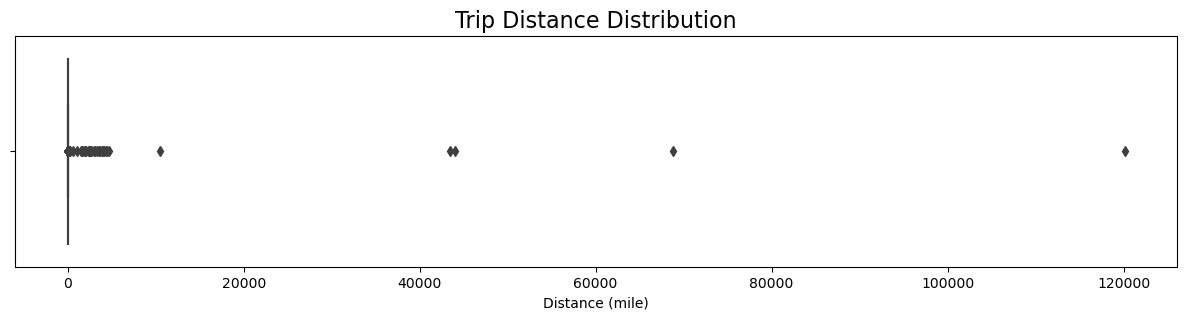

In [34]:
# creating "trip_distance" boxplot
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='trip_distance')
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

#### Limit trip_distance 

In [35]:
# limit trip_distance into 70 miles
df = df[df.trip_distance <= 70]

In [36]:
df.shape # before dropping outliers

(67991, 19)

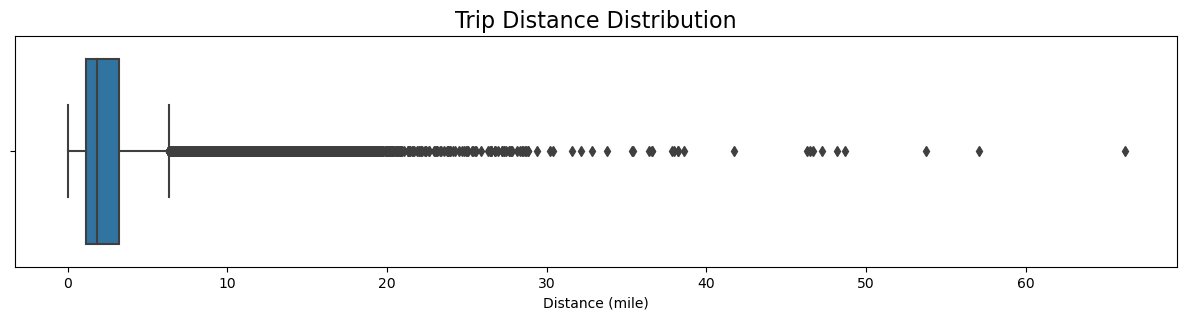

In [37]:
# creating "trip_distance" boxplot
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='trip_distance')
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

#### creating new column "distance_category"

In [38]:
# creating category
bins_of_distance = [-np.inf, 0, 3, 6, 10, np.inf] 
labels_of_distance = ["canceled",'<3 miles', '3-6 miles', '6-10 miles', '>10 miles']

df.insert(9, 'distance_category',  pd.cut(df['trip_distance'], bins=bins_of_distance, labels=labels_of_distance))

In [39]:
df.shape # after dropping outliers

(67991, 20)

In [40]:
# checking previous syntax
df_filtered =df [["trip_distance", "distance_category"]]
display(df_filtered, df['distance_category'].value_counts())

,trip_distance,distance_category
0,2.58,<3 miles
1,3.16,3-6 miles
2,2.55,<3 miles
3,1.96,<3 miles
4,2.10,<3 miles
...,...,...
68023,1.40,<3 miles
68024,0.99,<3 miles
68025,5.52,3-6 miles
68026,5.10,3-6 miles


distance_category
<3 miles      46105
3-6 miles     12269
6-10 miles     4642
canceled       3281
>10 miles      1694
Name: count, dtype: int64

### Handling  trip_duration column
In the trip duration column, there are extremely extreme outlier data. To address this, following the regulations enforced by the NYC TLC (New York City Taxi and Limousine Commission),<br>
the maximum allowable time for a driver to drive is 12 hours per day. Therefore, data with trip durations exceeding 12 hours need to be identified as outliers and are likely to be removed or processed accordingly in accordance with this policy.<br>
(source https://www.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf),<br>
maka trip duration pada data set ini dibatasi menjadi 12 jam

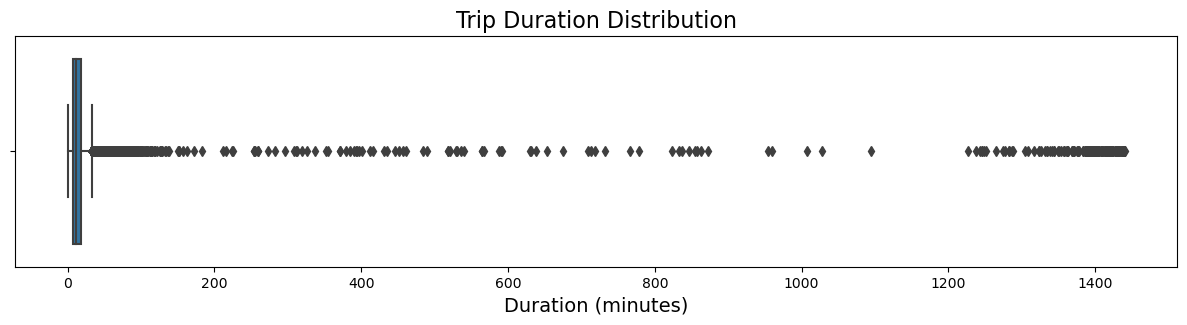

In [41]:
# # creating "trip_duration" boxplot
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='trip_duration')
plt.xlabel('Duration (minutes)', fontsize=14)
plt.title('Trip Duration Distribution', fontsize=16)
plt.show()

#### limit trip_duration

In [42]:
# limit trip_duration into 12 hours
df = df[df.trip_duration <= 720]


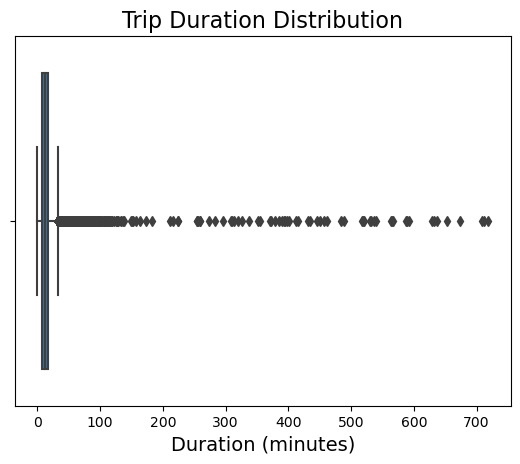

In [43]:
# # creating "trip_duration" boxplotplt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='trip_duration')
plt.xlabel('Duration (minutes)', fontsize=14)
plt.title('Trip Duration Distribution', fontsize=16)
plt.show()

#### creating duration_category

In [44]:
# creating duration category
bins_of_duration = [-np.inf, 0, 10, 20, 30, np.inf]
labels_of_duration = ['canceled', '<10 minutes', '10-20 minutes', '20-30 minutes', '>30 minutes']


df.insert(7, 'duration_category',  pd.cut(df['trip_duration'], bins=bins_of_duration, labels=labels_of_duration))

In [45]:
# checkingprevious syntax
display(df[["trip_duration", "duration_category"]], df['duration_category'].value_counts())

,trip_duration,duration_category
0,11.016667,10-20 minutes
1,17.866667,10-20 minutes
2,19.600000,10-20 minutes
3,14.350000,10-20 minutes
4,13.950000,10-20 minutes
...,...,...
68023,8.800000,<10 minutes
68024,4.733333,<10 minutes
68025,20.116667,20-30 minutes
68026,22.316667,20-30 minutes


duration_category
<10 minutes      28523
10-20 minutes    26635
20-30 minutes     8185
>30 minutes       4385
canceled            61
Name: count, dtype: int64

### Handling fare_amount column

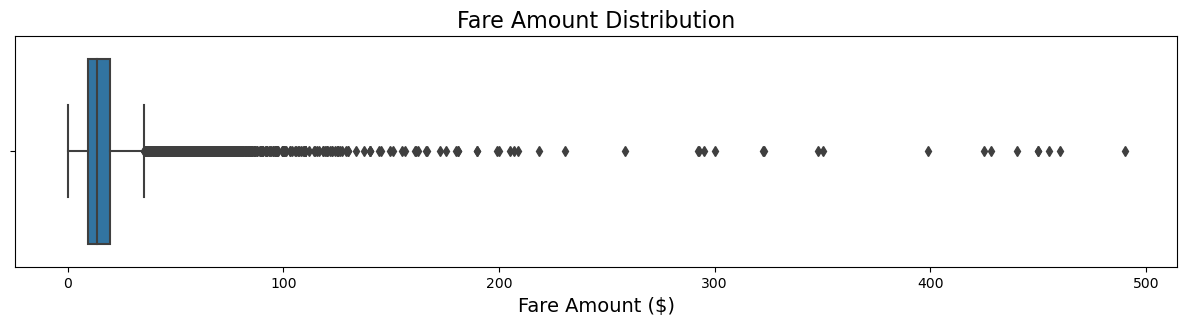

In [46]:
# # creating "fare_amount" boxplot
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='fare_amount')
plt.xlabel('Fare Amount ($)', fontsize=14)
plt.title('Fare Amount Distribution', fontsize=16)
plt.show()

#### Create fare_amount category

In [47]:
bins = [-0.1, 20, 40, 60, np.inf]
labels = ['<20$', '21-40$', '41-60$', '>60$']
# df['fare_amount_cat'] = pd.cut(df['fare_amount'], bins=bins_fare, labels=labels_fare)
df.insert(12, 'fare_amount_cat',  pd.cut(df['trip_duration'], bins=bins, labels=labels))

In [48]:
df['fare_amount_cat'].value_counts()

fare_amount_cat
<20$      55219
21-40$    10785
41-60$     1368
>60$        417
Name: count, dtype: int64

### Handling tip_amount column

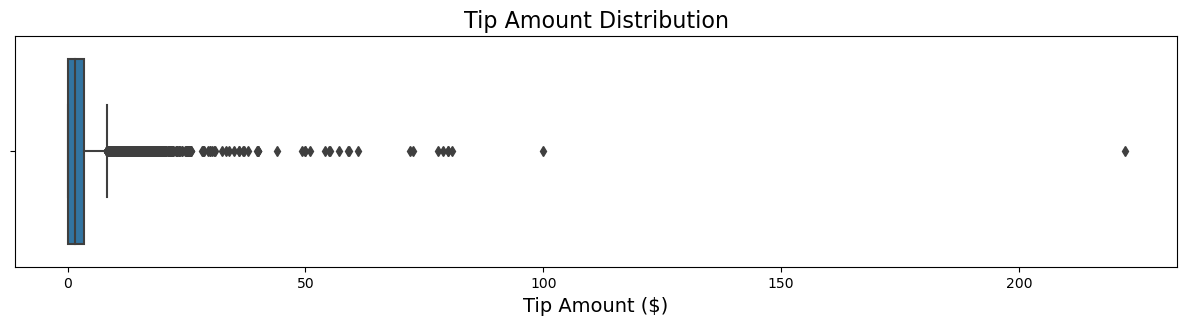

In [49]:
# # creating "tip_amount" boxplot
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='tip_amount')
plt.xlabel('Tip Amount ($)', fontsize=14)
plt.title('Tip Amount Distribution', fontsize=16)
plt.show()

#### Create tip_amount category

In [50]:
bins = [-np.inf, 0, 5, 10, 15, np.inf]
labels = ['0$', '1-5$', '6-10$', '11-15$', '>15$']
df.insert(14, 'tip_amount_cat',  pd.cut(df['tip_amount'], bins=bins, labels=labels))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67789 entries, 0 to 68027
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   pickup_datetime      67789 non-null  datetime64[s]
 1   dropoff_datetime     67789 non-null  datetime64[s]
 2   time_classification  67789 non-null  object       
 3   day                  67789 non-null  object       
 4   day_classification   67789 non-null  object       
 5   RatecodeID           67789 non-null  object       
 6   trip_duration        67789 non-null  float64      
 7   duration_category    67789 non-null  category     
 8   passenger_count      67789 non-null  float64      
 9   trip_distance        67789 non-null  float64      
 10  distance_category    67789 non-null  category     
 11  fare_amount          67789 non-null  float64      
 12  fare_amount_cat      67789 non-null  category     
 13  tip_amount           67789 non-null  float64      


In [52]:
df['tip_amount_cat'].value_counts()

tip_amount_cat
1-5$      31762
0$        28528
6-10$      6359
11-15$      803
>15$        337
Name: count, dtype: int64

## Final Checking
The final checking here is intended to perform a final review before visualizing the data.

In [53]:
# checking missing values
display(df.isna().sum(),df.isna().sum()/df.shape[0] * 100)

pickup_datetime          0
dropoff_datetime         0
time_classification      0
day                      0
day_classification       0
RatecodeID               0
trip_duration            0
duration_category        0
passenger_count          0
trip_distance            0
distance_category        0
fare_amount              0
fare_amount_cat          0
tip_amount               0
tip_amount_cat           0
payment_type             0
trip_type                0
pu_borough               0
pu_zone                 66
pu_service_zone        199
do_borough               0
do_zone                241
do_service_zone        659
dtype: int64

pickup_datetime        0.000000
dropoff_datetime       0.000000
time_classification    0.000000
day                    0.000000
day_classification     0.000000
RatecodeID             0.000000
trip_duration          0.000000
duration_category      0.000000
passenger_count        0.000000
trip_distance          0.000000
distance_category      0.000000
fare_amount            0.000000
fare_amount_cat        0.000000
tip_amount             0.000000
tip_amount_cat         0.000000
payment_type           0.000000
trip_type              0.000000
pu_borough             0.000000
pu_zone                0.097361
pu_service_zone        0.293558
do_borough             0.000000
do_zone                0.355515
do_service_zone        0.972134
dtype: float64

The table above shows that there are empty rows in the columns pu_zone, pu_service_zone, do_zone, and do_service_zone.<br>
These missing values are a result of looking up data from external sources.<br>
When considering the data percentage, the percentage of missing data is relatively small (less than 1%), so the data can be dropped.

In [54]:
# drop missing values
df.dropna(subset=['pu_zone', 'pu_service_zone', 'do_zone', 'do_service_zone'], inplace=True)

In [55]:
# checking previus syntax
df.isna().sum()

pickup_datetime        0
dropoff_datetime       0
time_classification    0
day                    0
day_classification     0
RatecodeID             0
trip_duration          0
duration_category      0
passenger_count        0
trip_distance          0
distance_category      0
fare_amount            0
fare_amount_cat        0
tip_amount             0
tip_amount_cat         0
payment_type           0
trip_type              0
pu_borough             0
pu_zone                0
pu_service_zone        0
do_borough             0
do_zone                0
do_service_zone        0
dtype: int64

# Data Finalization

## Final Data Frame

In [56]:
df

,pickup_datetime,dropoff_datetime,time_classification,day,day_classification,RatecodeID,trip_duration,duration_category,passenger_count,trip_distance,...,tip_amount,tip_amount_cat,payment_type,trip_type,pu_borough,pu_zone,pu_service_zone,do_borough,do_zone,do_service_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,overnight,Sunday,weekend,Standard rate,11.016667,10-20 minutes,1.0,2.58,...,4.03,1-5$,Credit card,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-02 18:56:58,2023-01-02 19:14:50,evening rush hour,Monday,weekdays,Standard rate,17.866667,10-20 minutes,1.0,3.16,...,0.00,0$,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
2,2023-01-03 15:28:11,2023-01-03 15:47:47,afternoon working hour,Tuesday,weekdays,Standard rate,19.600000,10-20 minutes,1.0,2.55,...,4.67,1-5$,Credit card,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
3,2023-01-03 17:37:14,2023-01-03 17:51:35,evening rush hour,Tuesday,weekdays,Standard rate,14.350000,10-20 minutes,1.0,1.96,...,0.00,0$,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
4,2023-01-03 19:03:53,2023-01-03 19:17:50,evening rush hour,Tuesday,weekdays,Standard rate,13.950000,10-20 minutes,2.0,2.10,...,0.00,0$,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68023,2023-01-04 14:06:53,2023-01-04 14:15:41,afternoon working hour,Wednesday,weekdays,Standard rate,8.800000,<10 minutes,1.0,1.40,...,0.00,0$,Cash,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Saint George/New Brighton,Boro Zone
68024,2023-01-11 17:18:54,2023-01-11 17:23:38,evening rush hour,Wednesday,weekdays,Standard rate,4.733333,<10 minutes,1.0,0.99,...,0.00,0$,Credit card,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Saint George/New Brighton,Boro Zone
68025,2023-01-13 18:54:31,2023-01-13 19:14:38,evening rush hour,Friday,weekdays,Standard rate,20.116667,20-30 minutes,1.0,5.52,...,0.00,0$,Cash,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Port Richmond,Boro Zone
68026,2023-01-18 14:37:37,2023-01-18 14:59:56,afternoon working hour,Wednesday,weekdays,Standard rate,22.316667,20-30 minutes,1.0,5.10,...,2.00,1-5$,Credit card,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Mariners Harbor,Boro Zone


In [57]:
display(df.describe(), df.describe(include='object'))

,pickup_datetime,dropoff_datetime,trip_duration,passenger_count,trip_distance,fare_amount,tip_amount
count,67086,67086,67086.000000,67086.000000,67086.000000,67086.000000,67086.000000
mean,2023-01-16 22:15:13,2023-01-16 22:29:20,14.115216,1.301822,2.649910,16.451869,2.140117
min,2023-01-01 00:01:31,2023-01-01 00:13:26,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2023-01-09 12:33:15,2023-01-09 12:42:16,7.266667,1.000000,1.130000,9.300000,0.000000
50%,2023-01-17 08:47:33,2023-01-17 09:03:02,11.400000,1.000000,1.860000,13.500000,1.630000
75%,2023-01-24 15:54:42,2023-01-24 16:10:54,17.350000,1.000000,3.200000,19.800000,3.340000
max,2023-01-31 23:58:23,2023-02-01 00:31:14,718.716667,9.000000,66.180000,490.000000,222.220000
std,NaN,NaN,16.554499,0.949031,2.651127,12.685473,2.982476


,time_classification,day,day_classification,RatecodeID,payment_type,trip_type,pu_borough,pu_zone,pu_service_zone,do_borough,do_zone,do_service_zone
count,67086,67086,67086,67086,67086,67086,67086,67086,67086,67086,67086,67086
unique,6,7,2,5,5,3,5,221,3,6,246,4
top,evening rush hour,Tuesday,weekdays,Standard rate,Credit card,street-hail,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone
freq,19637,11088,50539,65537,40135,61682,39125,13158,63123,39425,3496,43251


In [58]:
print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)

df shape: (67086, 23)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
pickup_datetime,pickup_datetime,datetime64[s],0,0.0,0,65674,"[2023-01-01 00:26:10, 2023-01-02 18:56:58, 202..."
dropoff_datetime,dropoff_datetime,datetime64[s],0,0.0,0,65622,"[2023-01-01 00:37:11, 2023-01-02 19:14:50, 202..."
time_classification,time_classification,object,0,0.0,0,6,"[overnight, evening rush hour, afternoon worki..."
day,day,object,0,0.0,0,7,"[Sunday, Monday, Tuesday, Wednesday, Thursday,..."
day_classification,day_classification,object,0,0.0,0,2,"[weekend, weekdays]"
RatecodeID,RatecodeID,object,0,0.0,0,5,"[Standard rate, Negotiated fare, JFK, Newark, ..."
trip_duration,trip_duration,float64,0,0.0,0,3408,"[11.016666666666667, 17.866666666666667, 19.6,..."
duration_category,duration_category,category,0,0.0,0,5,"['10-20 minutes', '<10 minutes', '20-30 minute..."
passenger_count,passenger_count,float64,0,0.0,0,9,"[1.0, 2.0, 3.0, 6.0, 4.0, 5.0, 8.0, 7.0, 9.0]"
trip_distance,trip_distance,float64,0,0.0,0,1764,"[2.58, 3.16, 2.55, 1.96, 2.1, 3.3, 3.2, 2.72, ..."


In [59]:
df.to_csv('NYC TLC cleaned.csv', index=False)  